In [9]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Simulation

In [78]:
tissue = 'simulation'
figpath = f'/stanley/WangLab/kamal/figures/projects/spin/reviews/{tissue}/'
os.makedirs(figpath, exist_ok=True)
dpi = 300

## Parse outputs

In [79]:
performance_files = glob(f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/{tissue}/*/performance_*')

In [80]:
performance_files

['/stanley/WangLab/kamal/data/projects/spin/reviews/results/simulation/utag/performance_simulation_utag_42429768.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/simulation/stagate/performance_simulation_stagate_42430818.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/simulation/knn/performance_simulation_knn_42429477.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/simulation/radius/performance_simulation_radius_42429759.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/simulation/graphst/performance_simulation_graphst_42430894.txt']

In [81]:
memusage_dict = dict()
runtime_dict = dict()

for pfile in performance_files:

    method = pfile.split('/')[-2]

    with open(pfile) as f:
        lines = f.readlines()
        memusages = [] # in GBs
        runtimes = [] # in mins
        for line in lines:
            if 'maxvmem' in line:
                if 'G' in line:
                    vmem = line.split(' ')[-1].split('G')[0]
                    vmem = float(vmem)
                    memusages.append(vmem)
                elif 'M' in line:
                    vmem = line.split(' ')[-1].split('M')[0]
                    vmem = float(vmem) / 1000
                    memusages.append(vmem)
            elif 'ru_utime' in line: # only care about utime, which ignores hardware allocation/execution time: https://man7.org/linux/man-pages/man2/getrusage.2.html#:~:text=The%20fields%20are%20interpreted%20as,structure%20(seconds%20plus%20microseconds)., https://www.reddit.com/r/cs50/comments/553okd/difference_between_ru_utime_and_ru_stime/
                wallclock = line.split('ru_utime')[-1].strip()
                wallclock = float(wallclock) / 60
                runtimes.append(wallclock)
    
    memusage_dict[method] = memusages
    runtime_dict[method] = runtimes

    memusage_df = pd.DataFrame(memusage_dict)
    runtime_df = pd.DataFrame(runtime_dict)

In [82]:
memusage_df

,utag,stagate,knn,radius,graphst
0,1.223000,6.611,0.967355,0.968633,3.408
1,1.037000,7.046,0.967359,0.968625,3.416
2,0.911516,6.632,0.967363,0.963680,3.410
3,1.254000,6.609,0.966785,0.968629,3.595
4,0.908438,6.583,0.967355,0.970629,3.409
5,1.037000,7.001,0.967039,0.968629,3.409
6,0.910184,7.483,0.973859,0.968617,3.417
7,0.907141,7.125,0.967355,0.961000,3.406
8,0.908230,6.326,0.967359,0.968613,3.414
9,1.223000,7.273,0.967359,0.968629,3.586


In [83]:
runtime_df

,utag,stagate,knn,radius,graphst
0,0.198233,2.989300,0.227667,0.171350,0.600250
1,0.194067,3.042667,0.158017,0.201733,0.600033
2,0.209233,2.892067,0.156950,0.164350,0.553067
3,0.240717,3.082267,0.178350,0.163033,0.620567
4,0.231733,2.841050,0.171567,0.140717,0.618950
5,0.212300,2.968600,0.183667,0.170283,0.577183
6,0.246533,2.941667,0.232400,0.210250,0.626700
7,0.223333,3.094950,0.131600,0.172417,0.589617
8,0.217017,3.016617,0.188033,0.239117,0.970650
9,0.230950,2.938067,0.202367,0.149917,0.623050


## Runtime from logger

In [84]:
methods = ['knn', 'radius', 'utag', 'stagate', 'graphst']
jobids = [42429477, 42429759, 42429768, 42430818, 42430894]

runtime_dict = dict()
for i in range(len(methods)):

    method = methods[i]
    jobid = jobids[i]

    runtimes = []
    for taskid in range(11,111,11):

        opath = f'/stanley/WangLab/kamal/outputs/spin/reviews/{tissue}/{method}/{tissue}_{method}.sh.o{jobid}.{taskid}'
        with open(opath) as f:
            lines = f.readlines()
            for line in lines:
                if 'Smoothing\n' in line:
                    start = line.split(' - ')[0][2:-4]
                elif 'Clustering\n' in line:
                    end = line.split(' - ')[0][2:-4]
            start = datetime.strptime(start, '%y-%m-%d %H:%M:%S')
            end = datetime.strptime(end, '%y-%m-%d %H:%M:%S')
            runtimes.append((end-start).seconds / 60)
        
    runtime_dict[method] = runtimes
    runtime_df = pd.DataFrame(runtime_dict)

In [85]:
runtime_dict

{'knn': [0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.03333333333333333,
  0.03333333333333333,
  0.03333333333333333,
  0.016666666666666666,
  0.016666666666666666,
  0.03333333333333333,
  0.016666666666666666],
 'radius': [0.03333333333333333,
  0.016666666666666666,
  0.03333333333333333,
  0.03333333333333333,
  0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.03333333333333333,
  0.03333333333333333,
  0.03333333333333333],
 'utag': [0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.03333333333333333,
  0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666,
  0.016666666666666666],
 'stagate': [5.183333333333334,
  6.116666666666666,
  5.25,
  5.633333333333334,
  6.083333333333333,
  6.066666666666666,
  5.883333333333334,
  6.016666666666667,
  6.3,
  5.8],
 'graphst': [0.6833333333333333,
  0.6833333333333333,
  0.6333333333333333,
  0.6

## Plot performance

In [86]:
order = ['knn', 'radius', 'utag', 'stagate', 'graphst']
hue_order = order

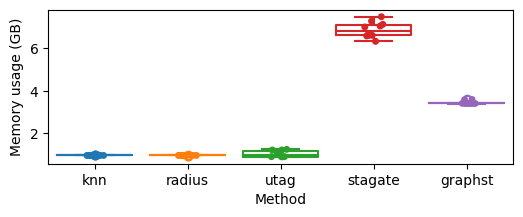

In [87]:
plt.figure(figsize=(6,2))
sns.boxplot(data=memusage_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=memusage_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Memory usage (GB)')
plt.xlabel('Method')

filename = f'memusage_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()

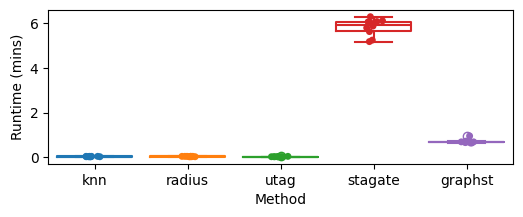

In [88]:
plt.figure(figsize=(6,2))
sns.boxplot(data=runtime_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=runtime_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Runtime (mins)')
plt.xlabel('Method')

filename = f'runtime_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()

# Brain

In [2]:
tissue = 'brain'
figpath = f'/stanley/WangLab/kamal/figures/projects/spin/reviews/{tissue}/'
os.makedirs(figpath, exist_ok=True)
dpi = 300

## Parse outputs

In [3]:
performance_files = glob(f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/{tissue}/*/performance_*')

In [4]:
performance_files

['/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/utag/performance_brain_utag_42435534.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/stagate/performance_brain_stagate_42435535.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/knn/performance_brain_knn_42435516.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/radius/performance_brain_radius_42435533.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/brain/graphst/performance_brain_graphst_42435536.txt']

In [5]:
memusage_dict = dict()
runtime_dict = dict()

for pfile in performance_files:

    method = pfile.split('/')[-2]

    with open(pfile) as f:
        lines = f.readlines()
        memusages = [] # in GBs
        runtimes = [] # in mins
        for line in lines:
            if 'maxvmem' in line:
                if 'G' in line:
                    vmem = line.split(' ')[-1].split('G')[0]
                    vmem = float(vmem)
                    memusages.append(vmem)
                elif 'M' in line:
                    vmem = line.split(' ')[-1].split('M')[0]
                    vmem = float(vmem) / 1000
                    memusages.append(vmem)
            elif 'ru_utime' in line: # only care about utime, which ignores hardware allocation/execution time: https://man7.org/linux/man-pages/man2/getrusage.2.html#:~:text=The%20fields%20are%20interpreted%20as,structure%20(seconds%20plus%20microseconds)., https://www.reddit.com/r/cs50/comments/553okd/difference_between_ru_utime_and_ru_stime/
                wallclock = line.split('ru_utime')[-1].strip()
                wallclock = float(wallclock) / 60
                runtimes.append(wallclock)
    
    memusage_dict[method] = memusages
    runtime_dict[method] = runtimes

    memusage_df = pd.DataFrame(memusage_dict)
    runtime_df = pd.DataFrame(runtime_dict)

In [6]:
memusage_df

,utag,stagate,knn,radius,graphst
0,44.092,33.000,2.093,2.140,32.935
1,44.061,32.976,2.093,1.789,32.935
2,44.061,32.999,1.845,1.871,32.935
3,44.092,33.007,1.763,2.140,32.935
4,44.092,32.819,1.845,2.140,32.935
5,44.092,33.000,1.632,2.140,32.935
6,44.061,32.811,2.093,2.140,32.935
7,44.061,32.968,1.884,1.871,32.935
8,44.061,33.000,1.865,2.140,32.935
9,44.061,33.007,2.093,1.910,32.935


In [7]:
runtime_df

,utag,stagate,knn,radius,graphst
0,0.012533,26.039617,5.912367,6.882800,28.480050
1,7.004967,28.133950,1.301333,5.807883,28.169017
2,2.661833,28.776050,1.537150,1.157933,28.467833
3,5.408267,54.732000,1.126100,3.672050,64.570633
4,12.752883,28.020383,2.449083,6.398783,28.442833
5,63.011067,25.569817,5.551533,5.349033,26.620583
6,2.684200,26.158517,3.324767,2.602667,58.258250
7,2.883150,27.652283,1.089250,6.583783,64.620867
8,7.400367,26.066317,3.875417,5.098583,64.660017
9,7.490983,27.010017,3.670050,6.684150,29.337433


## Runtime from logger

In [74]:
methods = ['knn', 'radius', 'utag', 'stagate', 'graphst']
jobids = [42435516, 42435533 ,42435534, 42435535, 42435536]

runtime_dict = dict()
for i in range(len(methods)):

    method = methods[i]
    jobid = jobids[i]

    runtimes = []
    for taskid in range(11,111,11):

        opath = f'/stanley/WangLab/kamal/outputs/spin/reviews/{tissue}/{method}/{tissue}_{method}.sh.o{jobid}.{taskid}'
        with open(opath) as f:
            lines = f.readlines()
            for line in lines:
                if 'Smoothing\n' in line:
                    start = line.split(' - ')[0][2:-4]
                elif 'Clustering\n' in line:
                    end = line.split(' - ')[0][2:-4]
            start = datetime.strptime(start, '%y-%m-%d %H:%M:%S')
            end = datetime.strptime(end, '%y-%m-%d %H:%M:%S')
            runtimes.append((end-start).seconds / 60)
        
    runtime_dict[method] = runtimes
    runtime_df = pd.DataFrame(runtime_dict)

In [75]:
runtime_dict

{'knn': [0.23333333333333334,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.21666666666666667,
  0.21666666666666667,
  0.2,
  0.2],
 'radius': [0.21666666666666667,
  0.21666666666666667,
  0.18333333333333332,
  0.21666666666666667,
  0.21666666666666667,
  0.21666666666666667,
  0.2,
  0.2,
  0.21666666666666667,
  0.2],
 'utag': [4.233333333333333,
  2.2333333333333334,
  2.25,
  4.466666666666667,
  4.55,
  4.25,
  2.283333333333333,
  2.216666666666667,
  2.216666666666667,
  2.2],
 'stagate': [44.016666666666666,
  56.2,
  51.56666666666667,
  89.6,
  50.46666666666667,
  49.416666666666664,
  39.75,
  55.583333333333336,
  36.0,
  52.75],
 'graphst': [26.05,
  24.583333333333332,
  26.066666666666666,
  54.68333333333333,
  24.816666666666666,
  24.466666666666665,
  47.733333333333334,
  53.916666666666664,
  54.6,
  27.183333333333334]}

## Plot performance

In [76]:
order = ['knn', 'radius', 'utag', 'stagate', 'graphst']
hue_order = order

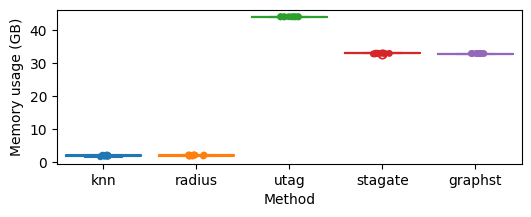

In [61]:
plt.figure(figsize=(6,2))
sns.boxplot(data=memusage_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=memusage_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Memory usage (GB)')
plt.xlabel('Method')

filename = f'memusage_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()

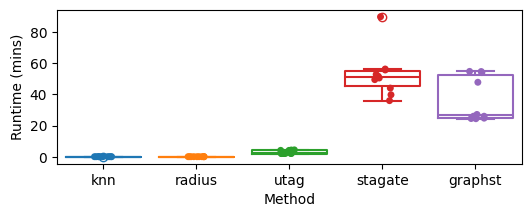

In [77]:
plt.figure(figsize=(6,2))
sns.boxplot(data=runtime_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=runtime_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Runtime (mins)')
plt.xlabel('Method')

filename = f'runtime_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()

# Gut

In [2]:
tissue = 'gut'
figpath = f'/stanley/WangLab/kamal/figures/projects/spin/reviews/{tissue}/'
os.makedirs(figpath, exist_ok=True)
dpi = 300

## Parse outputs

In [3]:
performance_files = glob(f'/stanley/WangLab/kamal/data/projects/spin/reviews/results/{tissue}/*/performance_*')

In [4]:
performance_files

['/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/utag/performance_gut_utag_42437788.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/stagate/performance_gut_stagate_42437789.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/knn/performance_gut_knn_42437430.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/radius/performance_gut_radius_42437787.txt',
 '/stanley/WangLab/kamal/data/projects/spin/reviews/results/gut/graphst/performance_gut_graphst_42437790.txt']

In [5]:
memusage_dict = dict()
runtime_dict = dict()

for pfile in performance_files:

    method = pfile.split('/')[-2]

    with open(pfile) as f:
        lines = f.readlines()
        memusages = [] # in GBs
        runtimes = [] # in mins
        for line in lines:
            if 'maxvmem' in line:
                if 'G' in line:
                    vmem = line.split(' ')[-1].split('G')[0]
                    vmem = float(vmem)
                    memusages.append(vmem)
                elif 'M' in line:
                    vmem = line.split(' ')[-1].split('M')[0]
                    vmem = float(vmem) / 1000
                    memusages.append(vmem)
            elif 'ru_utime' in line: # only care about utime, which ignores hardware allocation/execution time: https://man7.org/linux/man-pages/man2/getrusage.2.html#:~:text=The%20fields%20are%20interpreted%20as,structure%20(seconds%20plus%20microseconds)., https://www.reddit.com/r/cs50/comments/553okd/difference_between_ru_utime_and_ru_stime/
                wallclock = line.split('ru_utime')[-1].strip()
                wallclock = float(wallclock) / 60
                runtimes.append(wallclock)
    
    memusage_dict[method] = memusages
    runtime_dict[method] = runtimes

    memusage_df = pd.DataFrame(memusage_dict)
    runtime_df = pd.DataFrame(runtime_dict)

In [6]:
memusage_df

,utag,stagate,knn,radius,graphst
0,184.589,63.748,2.854,3.419,127.556
1,184.589,63.649,2.934,2.957,127.556
2,184.589,62.811,3.370,3.419,127.556
3,184.589,63.583,3.370,3.419,127.556
4,184.589,63.748,2.854,2.917,127.556
5,184.590,64.175,3.370,3.419,127.556
6,184.589,63.748,2.854,3.419,127.556
7,184.589,64.208,2.934,2.917,127.556
8,184.589,63.945,3.370,3.419,127.556
9,184.589,63.846,3.370,3.419,127.556


In [7]:
runtime_df

,utag,stagate,knn,radius,graphst
0,21.780317,60.858267,8.629300,17.983300,94.930150
1,26.938633,58.318267,11.992850,8.700550,193.595367
2,24.431650,79.758683,8.632367,18.871267,99.466617
3,38.839600,78.191550,14.428450,12.953150,194.284383
4,27.351250,79.007683,9.089850,11.643417,101.737850
5,21.674133,59.458417,8.818000,12.566583,101.740033
6,0.013117,54.620850,8.737700,11.675267,98.041600
7,25.714000,78.140350,11.819417,107.366017,195.262250
8,23.638917,59.122583,9.062133,9.559017,194.301200
9,27.379333,76.755550,10.400650,17.121183,197.445733


## Runtime from logger

In [10]:
methods = ['knn', 'radius', 'utag', 'stagate', 'graphst']
jobids = [42437430, 42437787, 42437788, 42437789, 42437790]

runtime_dict = dict()
for i in range(len(methods)):

    method = methods[i]
    jobid = jobids[i]

    runtimes = []
    for taskid in range(11,111,11):

        opath = f'/stanley/WangLab/kamal/outputs/spin/reviews/{tissue}/{method}/{tissue}_{method}.sh.o{jobid}.{taskid}'
        with open(opath) as f:
            lines = f.readlines()
            for line in lines:
                if 'Smoothing\n' in line:
                    start = line.split(' - ')[0][2:-4]
                elif 'Clustering\n' in line:
                    end = line.split(' - ')[0][2:-4]
            start = datetime.strptime(start, '%y-%m-%d %H:%M:%S')
            end = datetime.strptime(end, '%y-%m-%d %H:%M:%S')
            runtimes.append((end-start).seconds / 60)
        
    runtime_dict[method] = runtimes
    runtime_df = pd.DataFrame(runtime_dict)

In [11]:
runtime_dict

{'knn': [0.38333333333333336,
  0.4166666666666667,
  0.4,
  0.5833333333333334,
  0.43333333333333335,
  0.38333333333333336,
  0.38333333333333336,
  0.5833333333333334,
  0.4,
  0.4],
 'radius': [0.7666666666666667,
  0.4166666666666667,
  0.7833333333333333,
  0.4166666666666667,
  0.5,
  0.38333333333333336,
  0.4166666666666667,
  0.4,
  0.4166666666666667,
  0.7166666666666667],
 'utag': [13.933333333333334,
  14.85,
  13.95,
  14.15,
  13.95,
  14.216666666666667,
  13.883333333333333,
  14.016666666666667,
  14.016666666666667,
  14.416666666666666],
 'stagate': [110.66666666666667,
  107.5,
  121.85,
  119.56666666666666,
  119.13333333333334,
  107.15,
  100.53333333333333,
  117.65,
  108.36666666666666,
  116.06666666666666],
 'graphst': [80.45,
  167.46666666666667,
  88.43333333333334,
  168.05,
  89.93333333333334,
  89.81666666666666,
  82.55,
  168.66666666666666,
  168.4,
  171.0]}

## Plot performance

In [12]:
order = ['knn', 'radius', 'utag', 'stagate', 'graphst']
hue_order = order

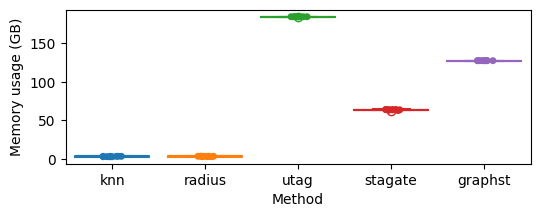

In [13]:
plt.figure(figsize=(6,2))
sns.boxplot(data=memusage_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=memusage_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Memory usage (GB)')
plt.xlabel('Method')

filename = f'memusage_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()

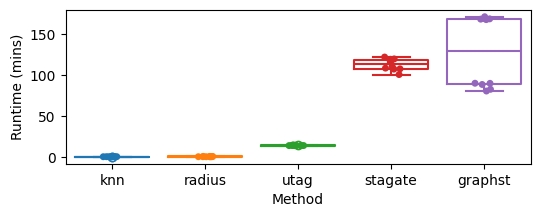

In [14]:
plt.figure(figsize=(6,2))
sns.boxplot(data=runtime_df, log_scale=False, fill=False, order=order, hue_order=hue_order)
sns.stripplot(data=runtime_df, log_scale=False, order=order, hue_order=hue_order)
plt.ylabel('Runtime (mins)')
plt.xlabel('Method')

filename = f'runtime_{tissue}.png'
filepath = os.path.join(figpath,filename)
plt.savefig(filepath, bbox_inches='tight', dpi=dpi)

plt.show()